# **사전준비 for colab**
matplotlib 그래프 내 한글 글꼴 표시를 위한 설치 및 런타임 다시 시작과 폰트 설정 작업을 단계별로 수행한다.

## [1] 폰트 설치 (나눔글꼴) 및 폰트매니저 재구성

In [ ]:

####  없어도 됨 [폰트개수 확인용]
# 시스템내 최초 설치된 폰트개수 확인 - 처음에는 기본 폰트만 설치됨

import matplotlib.font_manager as fm  # 폰트 관련 용도
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 17
nanum_font number: 0


In [ ]:
# 나눔고딕 폰트 설치

!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 160980 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
####  없어도 됨 [폰트개수 확인용]
# 설치 후  폰트 개수 확인,  늘어 난 것을 알 수 있다.

import matplotlib.font_manager as fm  # 폰트 관련 용도
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 48
nanum_font number: 31


In [ ]:
# 폰트 매니저 재설정을 위한 명령문 수행 : fm._rebuild()
import matplotlib.font_manager as fm
fm._rebuild()

## [2] 폰트 인식을 위한  '런타임 다시시작'
  - '런타임' - '런타임 다시 시작' 
  - 또는 'Ctrl-M'

## [3] 런타임 재시작 이후 
   - 폰트  설정 및 마이너스 부호 오류 처리
   - **시작 이후에는 본 셀 이후 부터 실행한다.**

In [ ]:
# 관련 라이브러리 임포트
import matplotlib.font_manager as fm  # 폰트 관련 
import matplotlib.pyplot as plt   # 그래프 내 설정
import matplotlib as mpl  # 기본 설정 

In [ ]:
####  없어도 됨 [폰트개수 확인용]
# 런타임 다시 시작 이후, 설치 된 폰트 개수가 증가 한 상태임을 알 수 있다. 
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 48
nanum_font number: 31


In [ ]:
# 폰트의 경로를 통해 사용할 폰트 (나눔고딕)를 지정한다.
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 설치된 나눔글꼴중 사용할 폰트의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
# 마이너스 부호 처리에 오류가 있는 경우를 방지 하기 위한 설정
mpl.rcParams['axes.unicode_minus'] = False  

NanumGothic


# **데이터 수집**

### 판다스 라이브러리 불러오기

**# import**

In [ ]:
import pandas as pd 

판다스 라이브러리를 불러와봅시다.

In [ ]:
import pandas as pd

### 데이터 프레임 생성하기 : CVS 파일 읽어오기
   - CSV 파일의 한글을 읽기 위해서 encoding 란에 'euc-kr'을 사용합니다.
   - 'euc-kr'은 완성형 한글을 의미합니다.

왼쪽의 화살표 실행버튼을 눌러 파일을 불러온 후 데이터프레임으로 저장합니다.

**# pd.read_csv**

In [ ]:
corona = pd.read_csv('https://github.com/sagelab4data/first_da_2021_1/blob/main/Day2_corona_cases_local.csv?raw=true', 
                     encoding='euc-kr')
corona

,상태별,2020. 04. 01,2020. 04. 02,2020. 04. 03,2020. 04. 04,2020. 04. 05,2020. 04. 06,2020. 04. 07,2020. 04. 08,2020. 04. 09,2020. 04. 10,2020. 04. 11,2020. 04. 12,2020. 04. 13,2020. 04. 14,2020. 04. 15,2020. 04. 16,2020. 04. 17,2020. 04. 18,2020. 04. 19,2020. 04. 20,2020. 04. 21,2020. 04. 22,2020. 04. 23,2020. 04. 24,2020. 04. 25,2020. 04. 26,2020. 04. 27,2020. 04. 28,2020. 04. 29,2020. 04. 30,2020. 05. 01,2020. 05. 02,2020. 05. 03,2020. 05. 04,2020. 05. 05,2020. 05. 06,2020. 05. 07,2020. 05. 08,2020. 05. 09,...,2021. 02. 15,2021. 02. 16,2021. 02. 17,2021. 02. 18,2021. 02. 19,2021. 02. 20,2021. 02. 21,2021. 02. 22,2021. 02. 23,2021. 02. 24,2021. 02. 25,2021. 02. 26,2021. 02. 27,2021. 02. 28,2021. 03. 01,2021. 03. 02,2021. 03. 03,2021. 03. 04,2021. 03. 05,2021. 03. 06,2021. 03. 07,2021. 03. 08,2021. 03. 09,2021. 03. 10,2021. 03. 11,2021. 03. 12,2021. 03. 13,2021. 03. 14,2021. 03. 15,2021. 03. 16,2021. 03. 17,2021. 03. 18,2021. 03. 19,2021. 03. 20,2021. 03. 21,2021. 03. 22,2021. 03. 23,2021. 03. 24,2021. 03. 25,2021. 03. 26
0,해외유입,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,5,12,24,16,12,11,11,14,9,5,7,5,6,4,2,4,9,7,12,5,4,8,6,10,8,3,2,3,11,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,10,22,17,25,18,23,17,14,17,11,19,18,21,21,16,23,12,18,17,18,22,12,19,19,15,17,11,23,15
1,국내발생,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,22,18,8,9,15,16,11,8,9,3,6,4,5,4,4,6,1,3,2,4,0,1,0,3,0,0,0,1,1,17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,382,405,334,338,319,426,401,381,404,399,335,427,452,444,467,474,436,370,345,452,427,441,440,437,396,331,411,419,471,490
2,신규,101.0,89.0,86.0,94.0,81.0,47.0,47.0,53.0,39,27,30,32,25,27,27,22,22,18,8,13,9,11,8,6,10,10,10,14,9,4,9,6,13,8,3,2,4,12,18,...,457.0,621.0,621.0,561.0,446.0,416.0,332.0,357.0,440.0,396.0,406,415,356,355,344,444,424,398,418,416,346,446,470,465,488,490,459,382,363,469,445,463,452,456,415,346,428,430,494,505


**# type( )**

In [ ]:
# corona의 타입을 확인해보면 데이터프레임을 알 수 있습니다.

type(corona)

pandas.core.frame.DataFrame

### 데이터 프레임 생성하기 : 값을 직접 입력
   - pd.DataFrame( ) 명령으로 직접 데이터프레임을 생성하기
   - 대소문자에 주의   - 직접 입력하여 연습해봅시다.

**# pd.DataFrame( )**

In [ ]:
df1 = pd.DataFrame([1, 2])
df1

,0
0,1
1,2


In [ ]:
df2 = pd.DataFrame([ [1, 2], [3, 4] ])
df2

,0,1
0,1,2
1,3,4


문자로 된 데이터프레임을 만들어 봅시다.

문자는 작은 따옴표 ' '를 사용해서 표시합니다.



In [ ]:
df3 = pd.DataFrame([ ['A', 'B'], ['C', 'D']])
df3

,0,1
0,A,B
1,C,D


자유롭게 데이터프레임을 만들어보세요.

# **데이터 가공**

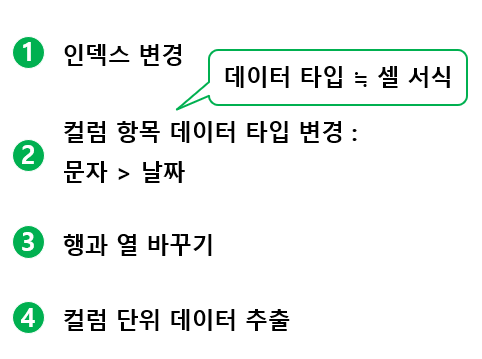

### 인덱스 변경

corona 데이터프레임에 설정된 인덱스와 컬럼을 알아봅시다.

**# corona.index**

In [ ]:
# corona 데이터프레임의 인덱스

corona.index

RangeIndex(start=0, stop=3, step=1)

**# corona.columns**

In [ ]:
# corona 데이터프레임의 컬럼을 알아봅시다.

corona.columns

Index(['상태별', '2020. 02. 04', '2020. 02. 05', '2020. 02. 06', '2020. 02. 07',
       '2020. 02. 08', '2020. 02. 09', '2020. 02. 10', '2020. 02. 11',
       '2020. 02. 12',
       ...
       '2020. 10. 22', '2020. 10. 23', '2020. 10. 24', '2020. 10. 25',
       '2020. 10. 26', '2020. 10. 27', '2020. 10. 28', '2020. 10. 29',
       '2020. 10. 30', '2020. 10. 31'],
      dtype='object', length=272)

set_index( )를 사용하여 corona 데이터프레임의 인덱스를 '상태별'로 지정합니다.

**# set_index('상태별')**

변경 사항(인덱스를 '상태별'로 변경)을 새 데이터프레임인 corona1에 저장합니다.

corona1의 결과를 보면 인덱스가 변경된 내역을 볼 수 있습니다.

In [ ]:
# 데이터를 분석하기 좋게 '상태별' 컬럼을 인덱스로 세팅합니다.
# 중간 변수인 corona1을 사용합니다.

corona1 = corona.set_index('상태별')
corona1

,2020. 04. 01,2020. 04. 02,2020. 04. 03,2020. 04. 04,2020. 04. 05,2020. 04. 06,2020. 04. 07,2020. 04. 08,2020. 04. 09,2020. 04. 10,2020. 04. 11,2020. 04. 12,2020. 04. 13,2020. 04. 14,2020. 04. 15,2020. 04. 16,2020. 04. 17,2020. 04. 18,2020. 04. 19,2020. 04. 20,2020. 04. 21,2020. 04. 22,2020. 04. 23,2020. 04. 24,2020. 04. 25,2020. 04. 26,2020. 04. 27,2020. 04. 28,2020. 04. 29,2020. 04. 30,2020. 05. 01,2020. 05. 02,2020. 05. 03,2020. 05. 04,2020. 05. 05,2020. 05. 06,2020. 05. 07,2020. 05. 08,2020. 05. 09,2020. 05. 10,...,2021. 02. 15,2021. 02. 16,2021. 02. 17,2021. 02. 18,2021. 02. 19,2021. 02. 20,2021. 02. 21,2021. 02. 22,2021. 02. 23,2021. 02. 24,2021. 02. 25,2021. 02. 26,2021. 02. 27,2021. 02. 28,2021. 03. 01,2021. 03. 02,2021. 03. 03,2021. 03. 04,2021. 03. 05,2021. 03. 06,2021. 03. 07,2021. 03. 08,2021. 03. 09,2021. 03. 10,2021. 03. 11,2021. 03. 12,2021. 03. 13,2021. 03. 14,2021. 03. 15,2021. 03. 16,2021. 03. 17,2021. 03. 18,2021. 03. 19,2021. 03. 20,2021. 03. 21,2021. 03. 22,2021. 03. 23,2021. 03. 24,2021. 03. 25,2021. 03. 26
상태별,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
해외유입,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,5,12,24,16,12,11,11,14,9,5,7,5,6,4,2,4,9,7,12,5,4,8,6,10,8,3,2,3,11,1,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,10,22,17,25,18,23,17,14,17,11,19,18,21,21,16,23,12,18,17,18,22,12,19,19,15,17,11,23,15
국내발생,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,22,18,8,9,15,16,11,8,9,3,6,4,5,4,4,6,1,3,2,4,0,1,0,3,0,0,0,1,1,17,26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,382,405,334,338,319,426,401,381,404,399,335,427,452,444,467,474,436,370,345,452,427,441,440,437,396,331,411,419,471,490
신규,101.0,89.0,86.0,94.0,81.0,47.0,47.0,53.0,39,27,30,32,25,27,27,22,22,18,8,13,9,11,8,6,10,10,10,14,9,4,9,6,13,8,3,2,4,12,18,34,...,457.0,621.0,621.0,561.0,446.0,416.0,332.0,357.0,440.0,396.0,406,415,356,355,344,444,424,398,418,416,346,446,470,465,488,490,459,382,363,469,445,463,452,456,415,346,428,430,494,505


인덱스를 직접 설정하여 봅시다.

변경된 인덱스를 확인합니다.

In [ ]:
corona1.index

Index(['해외유입', '국내발생', '신규'], dtype='object', name='상태별')

In [ ]:
corona1.index

Index(['해외유입', '국내발생', '신규'], dtype='object', name='상태별')

### 컬럼 항목 데이터 타입 변경

판다스에는 문자, 정수, 실수, 날짜 등의 데이터 타입(자료형)이 있습니다.

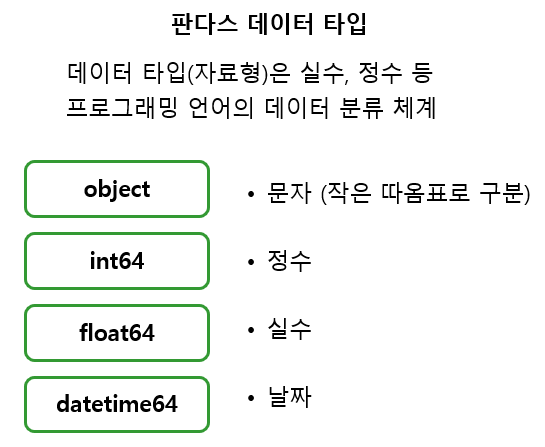

corona1 데이터프레임의 컬럼을 확인합니다.

In [ ]:
corona1.columns

Index(['2020. 02. 04', '2020. 02. 05', '2020. 02. 06', '2020. 02. 07',
       '2020. 02. 08', '2020. 02. 09', '2020. 02. 10', '2020. 02. 11',
       '2020. 02. 12', '2020. 02. 13',
       ...
       '2020. 10. 22', '2020. 10. 23', '2020. 10. 24', '2020. 10. 25',
       '2020. 10. 26', '2020. 10. 27', '2020. 10. 28', '2020. 10. 29',
       '2020. 10. 30', '2020. 10. 31'],
      dtype='object', length=271)

직접 입력하여 확인해봅시다.

현재 corona1 컬럼의 데이터타입은 문자(object)입니다.

pd.to_datetime( ) 명령으로 문자를 날짜형으로 변경합니다.

**# pd.to_datetime( )**

In [ ]:
# corona1의 컬럼은 문자(object) 타입입니다. datetime64로 바꾸어 줍니다.

corona1.columns = pd.to_datetime(corona1.columns)
corona1.columns

DatetimeIndex(['2020-04-01', '2020-04-02', '2020-04-03', '2020-04-04',
               '2020-04-05', '2020-04-06', '2020-04-07', '2020-04-08',
               '2020-04-09', '2020-04-10',
               ...
               '2021-03-17', '2021-03-18', '2021-03-19', '2021-03-20',
               '2021-03-21', '2021-03-22', '2021-03-23', '2021-03-24',
               '2021-03-25', '2021-03-26'],
              dtype='datetime64[ns]', length=360, freq=None)

직접 입력하여 컬럼의 데이터 타입을 변경하여 봅시다.

입력할 때 언더바 _ 에 주의하여 입력합니다.

### 행과 열 바꾸기

corona1에 변경된 내용을 다시 한번 살펴봅니다.

In [ ]:
corona1

,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,2020-04-29,2020-04-30,2020-05-01,2020-05-02,2020-05-03,2020-05-04,2020-05-05,2020-05-06,2020-05-07,2020-05-08,2020-05-09,2020-05-10,...,2021-02-15,2021-02-16,2021-02-17,2021-02-18,2021-02-19,2021-02-20,2021-02-21,2021-02-22,2021-02-23,2021-02-24,2021-02-25,2021-02-26,2021-02-27,2021-02-28,2021-03-01,2021-03-02,2021-03-03,2021-03-04,2021-03-05,2021-03-06,2021-03-07,2021-03-08,2021-03-09,2021-03-10,2021-03-11,2021-03-12,2021-03-13,2021-03-14,2021-03-15,2021-03-16,2021-03-17,2021-03-18,2021-03-19,2021-03-20,2021-03-21,2021-03-22,2021-03-23,2021-03-24,2021-03-25,2021-03-26
상태별,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
해외유입,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,5,12,24,16,12,11,11,14,9,5,7,5,6,4,2,4,9,7,12,5,4,8,6,10,8,3,2,3,11,1,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,10,22,17,25,18,23,17,14,17,11,19,18,21,21,16,23,12,18,17,18,22,12,19,19,15,17,11,23,15
국내발생,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,22,18,8,9,15,16,11,8,9,3,6,4,5,4,4,6,1,3,2,4,0,1,0,3,0,0,0,1,1,17,26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,382,405,334,338,319,426,401,381,404,399,335,427,452,444,467,474,436,370,345,452,427,441,440,437,396,331,411,419,471,490
신규,101.0,89.0,86.0,94.0,81.0,47.0,47.0,53.0,39,27,30,32,25,27,27,22,22,18,8,13,9,11,8,6,10,10,10,14,9,4,9,6,13,8,3,2,4,12,18,34,...,457.0,621.0,621.0,561.0,446.0,416.0,332.0,357.0,440.0,396.0,406,415,356,355,344,444,424,398,418,416,346,446,470,465,488,490,459,382,363,469,445,463,452,456,415,346,428,430,494,505


날짜가 인덱스로 설정되면 많은 양의 시계열 데이터도 편리하게 분석할 수 있습니다.


이를 위해 corona1의 행과 열을 맞바꿔 줍니다.

**# corona1.T**

In [ ]:
corona2 = corona1.T
corona2

상태별,해외유입,국내발생,신규
2020-04-01,NaN,NaN,101.0
2020-04-02,NaN,NaN,89.0
2020-04-03,NaN,NaN,86.0
2020-04-04,NaN,NaN,94.0
2020-04-05,NaN,NaN,81.0
...,...,...,...
2021-03-22,15.0,331.0,346.0
2021-03-23,17.0,411.0,428.0
2021-03-24,11.0,419.0,430.0
2021-03-25,23.0,471.0,494.0


### 컬럼 단위 데이터 추출하기

대괄호 [   ] 와 컬럼 항목 (작은 따옴표 '  ')를 사용하여 컬럼 단위 데이터를 추출합니다.

corona2 데이터프레임에서 '신규' 컬럼을 추출하여 corona_new로 저장합니다.

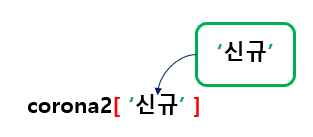

In [ ]:
corona_new = corona2['신규']
corona_new

2020-04-01    101.0
2020-04-02     89.0
2020-04-03     86.0
2020-04-04     94.0
2020-04-05     81.0
              ...  
2021-03-22    346.0
2021-03-23    428.0
2021-03-24    430.0
2021-03-25    494.0
2021-03-26    505.0
Name: 신규, Length: 360, dtype: float64

직접 입력하여 corona2의 '신규'열을 추출하여 corona_new로 저장해봅시다.

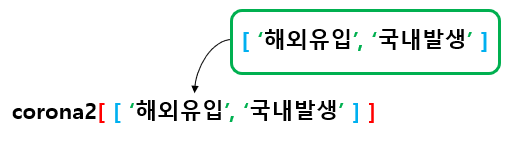

두 개 이상의 컬럼을 추출하기 위해서는 추가로 대괄호[  ]를 사용합니다.

'해외유입'과 '국내발생' 컬럼을 추출하여 새 변수인 corona_cause에 저장해 봅시다.

In [ ]:
corona_cause = corona2[['해외유입', '국내발생']]
corona_cause

상태별,해외유입,국내발생
2020-04-01,NaN,NaN
2020-04-02,NaN,NaN
2020-04-03,NaN,NaN
2020-04-04,NaN,NaN
2020-04-05,NaN,NaN
...,...,...
2021-03-22,15.0,331.0
2021-03-23,17.0,411.0
2021-03-24,11.0,419.0
2021-03-25,23.0,471.0


직접 입력하여 컬럼 2개를 추출하여 corona_cause에 저장해 봅시다.

시리즈는 데이터프레임의 열 1개와 같은 구조입니다.

위에서 추출한 corona_new와 corona_cause 의 타입을 알아봅시다.

컬럼 1개를 추출한 corona_new는 시리즈, 컬럼 2개를 추출한 corona_cause는 데이터프레임인 것을 알 수 있습니다.

In [ ]:
type(corona_new)

pandas.core.series.Series

In [ ]:
type(corona_cause)

pandas.core.frame.DataFrame

##간단한 그래프

plot( ) 명령을 사용하여 간단한 그래프를 그려봅시다.

**# corona_new.plot( );**

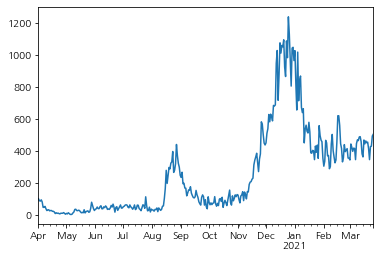

In [ ]:
corona_new.plot();

직접 입력하여 그래프를 간단히 그려봅시다.

세미콜론을 빼 먹지 않도록 합시다.

# **데이터 분석**

### 데이터 분석 개요

다양한 명령을 통해 데이터프레임의 대략적인 개요를 파악합니다.

In [ ]:
corona_new.head()

2020-04-01    101.0
2020-04-02     89.0
2020-04-03     86.0
2020-04-04     94.0
2020-04-05     81.0
Name: 신규, dtype: float64

In [ ]:
corona_new.tail()

2021-03-22    346.0
2021-03-23    428.0
2021-03-24    430.0
2021-03-25    494.0
2021-03-26    505.0
Name: 신규, dtype: float64

head( ) 및 tail( ) 명령은 괄호( )안에 숫자를 입력하면 그 숫자만큼의 행 데이터가 출력됩니다.

In [ ]:
corona_new.head(3)

2020-02-04    18.0
2020-02-05     1.0
2020-02-06     4.0
Name: 신규, dtype: float64

In [ ]:
corona_new.head(10)

2020-02-04    18.0
2020-02-05     1.0
2020-02-06     4.0
2020-02-07     1.0
2020-02-08     0.0
2020-02-09     3.0
2020-02-10     0.0
2020-02-11     1.0
2020-02-12     0.0
2020-02-13     0.0
Name: 신규, dtype: float64

명령어들을 자유롭게 실습해 봅시다.

### 데이터 기초 통계

최대, 최소, 평균, 중앙값들을 알아봅시다.

In [ ]:
#최소값 min( )

corona_new.min()

2.0

In [ ]:
# 최대값 max( )

corona_new.max()

1241.0

코로나가 제일 많이 발생한 건은 하루에 1241명이 확진된 경우인 것을 알 수 있습니다.

최소값과 최대값을 입력하여 연습합니다.

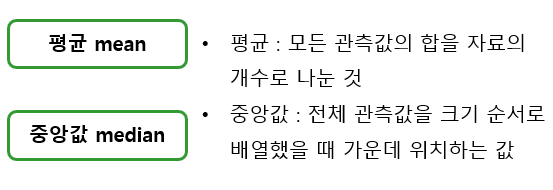

In [ ]:
corona_new.mean()

253.5861111111111

In [ ]:
corona_new.median()

116.0

직접 평균 및 중앙값을 입력해봅시다.

평균은 253명, 중앙값을 116명입니다.

평균은 극단값의 영향을 많이 받는 편입니다.

평균이 중앙값보다 높으므로, 히스토그램을 그릴 경우 오른쪽 꼬리가 긴 분포가 될 것임을 알 수 있습니다.

히스토그램을 hist( ) 명령으로 작성해봅시다.

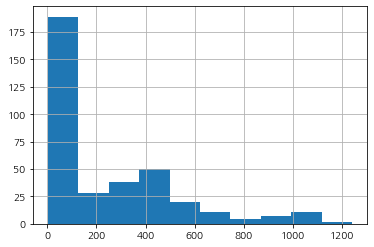

In [ ]:
corona_new.hist();

기본값으로 설정된 히스토그램 구간은 10 입니다.

이 구간을 20으로 늘려 히스토그램을 그려봅시다.
해당 명령은 bins를 지정하여 수행합니다.

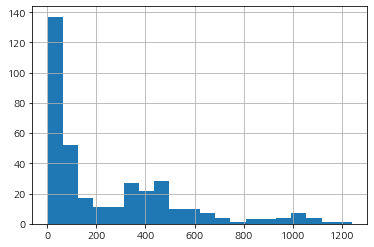

In [ ]:
corona_new.hist(bins=20);

보다 자세한 코로나 확진자 발생 현황을 알 수 있습니다.

직접 따라서 입력해봅시다.

### 데이터 정렬

sort_values( ) 명령은 데이터를 크기 순으로 나열합니다.

기본적으로 오름차순 (ascending) 으로 정렬합니다.

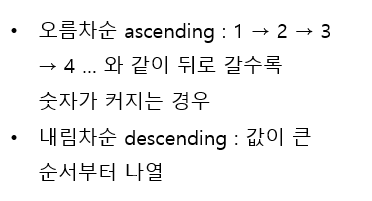

In [ ]:
corona_new.sort_values()

2020-05-06       2.0
2020-05-05       3.0
2020-04-30       4.0
2020-05-07       4.0
2020-04-24       6.0
               ...  
2020-12-16    1078.0
2020-12-23    1090.0
2020-12-20    1097.0
2020-12-26    1132.0
2020-12-25    1241.0
Name: 신규, Length: 360, dtype: float64

반대로 내림차순으로 정렬합니다.

In [ ]:
corona_new.sort_values(ascending=False)

2020-12-25    1241.0
2020-12-26    1132.0
2020-12-20    1097.0
2020-12-23    1090.0
2020-12-16    1078.0
               ...  
2020-04-24       6.0
2020-05-07       4.0
2020-04-30       4.0
2020-05-05       3.0
2020-05-06       2.0
Name: 신규, Length: 360, dtype: float64

nlargest( ) 및 nsmallest( )는 가장 큰 수 n개 및 가장 작은 수 n개를 구할 수 있습니다.

In [ ]:
corona_new.nlargest()

2020-12-25    1241.0
2020-12-26    1132.0
2020-12-20    1097.0
2020-12-23    1090.0
2020-12-16    1078.0
Name: 신규, dtype: float64

In [ ]:
corona_new.nsmallest()

2020-05-06    2.0
2020-05-05    3.0
2020-04-30    4.0
2020-05-07    4.0
2020-04-24    6.0
Name: 신규, dtype: float64

head( ) 및 tail( ) 명령과 마찬가지로 괄호( )안에 숫자를 넣어 n개의 데이터만 출력할 수 있습니다.

In [ ]:
corona_new.nlargest(10)

2020-02-29    813.0
2020-03-03    600.0
2020-03-01    586.0
2020-02-28    571.0
2020-03-06    518.0
2020-03-04    516.0
2020-02-27    505.0
2020-03-07    483.0
2020-03-02    476.0
2020-08-27    441.0
Name: 신규, dtype: float64

nlargest( ) 및 nsmallest( )를 자유롭게 연습해봅시다.

# **시각화 및 탐색**

plot( ) 명령에 다양한 조건을 주어 그래프를 그릴 수 있습니다.

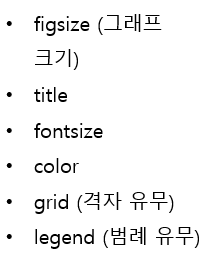

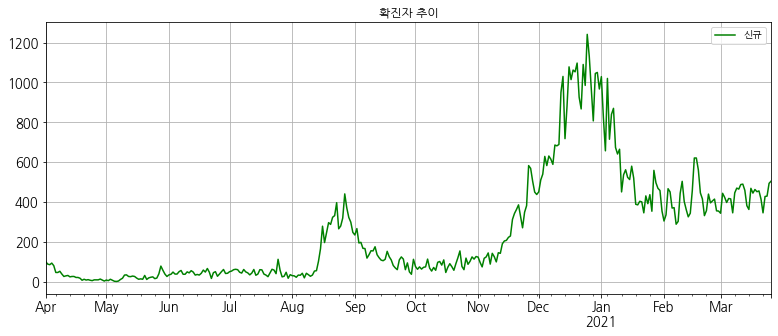

In [ ]:
corona_new.plot(figsize=(13, 5), title='확진자 추이', fontsize=13, 
                color='green', grid=True, legend=True);

자유롭게 그래프를 바꿔서 그려봅시다.

[색상 인덱스](https://developer.mozilla.org/en-US/docs/Web/CSS/color_value#:~:text=Color%20keywords%20are%20case%2Dinsensitive,rationale%20behind%20the%20names%20used.)

색상 인덱스에서 다양한 색상을 참조할 수 있습니다.